HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

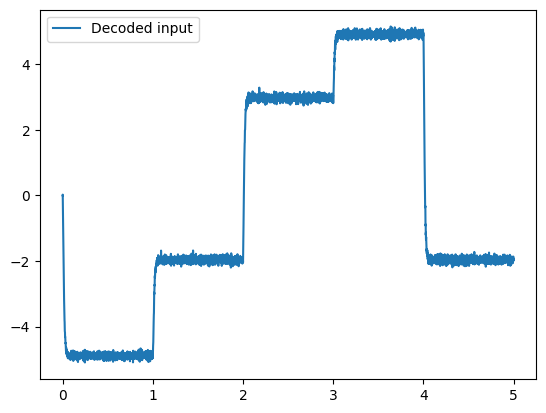

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise
from nengo.processes import WhiteSignal

## Relu activation

# Create the model object
model = nengo.Network(label="Multiplication")
with model:

    # Create a piecewise step function for input (piecewise input)
    inputA = nengo.Node(Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4:-2})) # piecewise 1


    # Create ensemble...
    input_neurons = nengo.Ensemble(100, dimensions=1, radius= 5)



    #node that connects back to nengo...
    nengo.Connection(inputA, input_neurons)
    

   


    #Probe, run, plot...

    #probe
    with model:
        inputA_probe = nengo.Probe(inputA)
        A_probe = nengo.Probe(input_neurons, synapse=0.01)

    #run 
    with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
        sim.run(5)

    #plot
    # Plot the input signals and decoded ensemble values
    plt.figure()
    plt.plot(sim.trange(), sim.data[A_probe], label="Decoded input")
    
    plt.legend(loc="best")
    


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

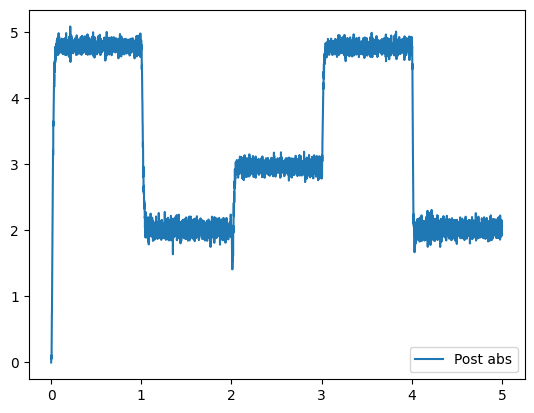

In [10]:
# above is your input signal as a piecewise...

# now create an absolute value function to use on your input...

with model:

# Define functions

    def abval(x):
        return np.abs(x)      #originally was square of x
    

# then apply the function to your input...
    
with model:
    # add an output node
    abVal_neurons = nengo.Ensemble(100, dimensions=1, radius=5)
    
    # connect the neuron ensemble to the output node with a function
    nengo.Connection(input_neurons, abVal_neurons, function=abval) 

    # probe the output to assess results
    abVal_probe = nengo.Probe(abVal_neurons, synapse=0.01)

# now create a plot to see if this is broken...
    
    #run 
    with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
        sim.run(5)

    #plot
    # Plot the input signals and decoded ensemble values
    plt.figure()
    plt.plot(sim.trange(), sim.data[abVal_probe], label="Post abs")
    
    plt.legend(loc="best")

    






HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

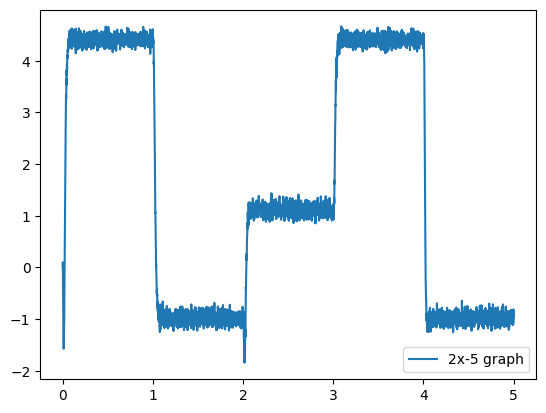

In [11]:
# now we need to create and apply the 2x+5 function...

# now create an absolute value function to use on your input...

with model:

# Define functions

    def twofive(x):
        return 2*x-5    #originally was square of x
    

# then apply the function to your input...
    
with model:
    # add an output node
    twofive_neurons = nengo.Ensemble(100, dimensions=1, radius=5)
    
    # connect the neuron ensemble to the output node with a function
    nengo.Connection(abVal_neurons, twofive_neurons, function=twofive)

    # probe the output to assess results
    twofive_probe = nengo.Probe(twofive_neurons, synapse=0.01)

    # now run and plot

    #run 
    with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
        sim.run(5)

    #plot
    # Plot the input signals and decoded ensemble values
    plt.figure()
    plt.plot(sim.trange(), sim.data[twofive_probe], label="2x-5 graph")
    
    plt.legend(loc="best")

    


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

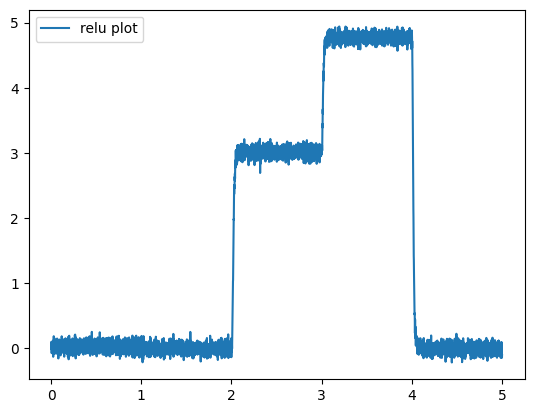

In [12]:
# now connect relu to your input function. Relu only
# keeps positive values use: if x<0 return 0 
# and if x < 0 return x

#create relu function...

with model:

# Define functions

    def relu_function(x):
        if x < 0: return 0    #returns zero if less than zero
        if x > 0: return x    #returns x if c is greater than 0.

with model:
    # add an output node
    relu_neurons = nengo.Ensemble(100, dimensions=1, radius=5) 
    
    # connect the neuron ensemble to the output node with a function
    nengo.Connection(input_neurons, relu_neurons, function=relu_function)

    # probe the output to assess results
    relu_probe = nengo.Probe(relu_neurons, synapse=0.01)
        
# runnning and plotting relu
    
    #run 
    with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
        sim.run(5)

    #plot
    # Plot the input signals and decoded ensemble values
    plt.figure()
    plt.plot(sim.trange(), sim.data[relu_probe], label="relu plot")
    
    plt.legend(loc="best")

    







HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

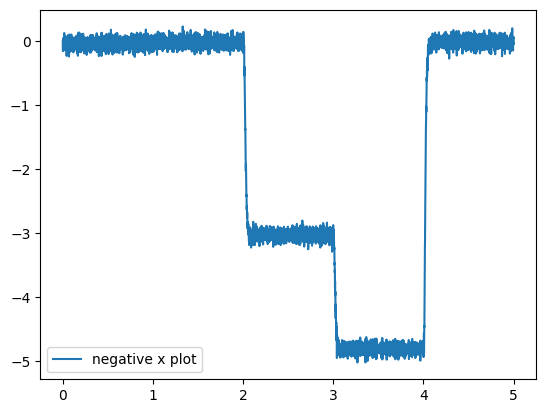

In [14]:
# RELU plot is above, now we need to connect RELU to a new negative x function

with model:

# Define functions    ---   -abs(x)

    def negativex_function(x):
        return x*-1      #originally was square of x



with model:
    # add an output node
    negativex_neurons = nengo.Ensemble(100, dimensions=1, radius=5) 
    
    # connect the neuron ensemble to the output node with a function
    nengo.Connection(relu_neurons, negativex_neurons, function=negativex_function)

    # probe the output to assess results
    negativex_probe = nengo.Probe(negativex_neurons, synapse=0.01)
        
# runnning and plotting relu
    
    #run 
    with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
        sim.run(5)

    #plot
    # Plot the input signals and decoded ensemble values
    plt.figure()
    plt.plot(sim.trange(), sim.data[negativex_probe], label="negative x plot")
    
    plt.legend(loc="best")



In [ ]:
# now I'm going to try to create the two input multiplier thing that takes in the negative x output and 2x-5 as its two inputs

# Create the model object
model = nengo.Network(label="Multiplication")
with model:

    # Create a piecewise step function for input
    inputA = nengo.Node(Piecewise({0: 0, 2.5: 1, 4: -1}))
    inputB = nengo.Node(Piecewise({0: 1, 1.5: .2, 3: 0, 4.5: .2}))

    

    # Create 4 ensembles of leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)
    combined = nengo.Ensemble(220, dimensions=2)  
    prod = nengo.Ensemble(100, dimensions=1)

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(inputA, A)
    nengo.Connection(inputB, B)

    # Connect input ensembles A and B to the 2D combined ensemble
    nengo.Connection(A, combined[0])
    nengo.Connection(B, combined[1])